## **Explore and Clean data**

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
sales = pd.read_csv('D:/AI & Data Science DEPI/Project Sales Forecasting/Global_Superstore2.csv' ,encoding='latin-1')
sales.shape

(51290, 24)

In [66]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [67]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [68]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

> **Drop useless Columns**

In [69]:
sales.drop(columns=['Row ID' ,'Order ID' ,'Customer ID','Postal Code','Product ID'] ,inplace=True)

> **Convert Order and Ship Date to Date time**

In [70]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

C:\Users\MF\AppData\Local\Temp\ipykernel_28340\3665113768.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'])
C:\Users\MF\AppData\Local\Temp\ipykernel_28340\3665113768.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])


In [71]:
sales.dtypes

Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [72]:
sales.isna().sum()  # No missing values

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

**Add the missed featuers**



In [73]:
sales['Month'] = sales['Order Date'].dt.month
sales['Quarter'] = sales['Order Date'].dt.quarter 
sales['Year'] = sales['Order Date'].dt.year
sales['Day_of_Week'] = sales['Order Date'].dt.dayofweek
sales['Is_Weekend'] = sales['Day_of_Week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Fri and Sat


In [74]:
from pandas.tseries.holiday import USFederalHolidayCalendar

# Add holiday feature
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=sales['Order Date'].min(), end=sales['Order Date'].max())
sales['Is_Holiday'] = sales['Order Date'].isin(holidays).astype(int)

In [75]:
# Add season feature
sales['Season'] = sales['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                 'Spring' if x in [3, 4, 5] else
                                                 'Summer' if x in [6, 7, 8] else
                                                 'Fall')

# Add total sales feature
sales['Total_sales'] = (sales['Sales']) * (sales['Quantity'])

In [76]:
sales['Season'] = sales['Season'].astype('category')


In [77]:
sales.isna().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Month             0
Quarter           0
Year              0
Day_of_Week       0
Is_Weekend        0
Is_Holiday        0
Season            0
Total_sales       0
dtype: int64

In [78]:
num_cols = sales.select_dtypes(include='number')
num_cols.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Total_sales
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,7.522636,2.793235,2012.777208,2.343264,0.108598,0.034900,1205.327987
std,487.565361,2.278766,0.212280,174.340972,57.296804,3.300056,1.066015,1.098931,1.671486,0.311137,0.183527,3452.079528
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.444000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,5.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,66.930000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,8.000000,3.000000,2013.000000,2.000000,0.000000,0.000000,245.772000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,10.000000,4.000000,2014.000000,4.000000,0.000000,0.000000,904.875000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,12.000000,4.000000,2014.000000,6.000000,1.000000,1.000000,135830.880000


In [79]:
sales['Is_Holiday'].value_counts()

Is_Holiday
0    49500
1     1790
Name: count, dtype: int64

**EDA**

In [80]:
sales.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,933.57,Critical,7,3,2012,1,0,0,Summer,16167.550
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,923.63,Critical,2,1,2013,1,0,0,Winter,33384.555


In [81]:
sales.iloc[:5 ,:23]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,2309.650,7,0.0,762.1845,933.57,Critical,7,3,2012,1
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,3709.395,9,0.1,-288.7650,923.63,Critical,2,1,2013,1
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,5175.171,9,0.1,919.9710,915.49,Medium,10,4,2013,3
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,2892.510,5,0.1,-96.5400,910.16,Medium,1,1,2013,0
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,2832.960,8,0.0,311.5200,903.04,Critical,11,4,2013,1


> **check corrolation between num Data**

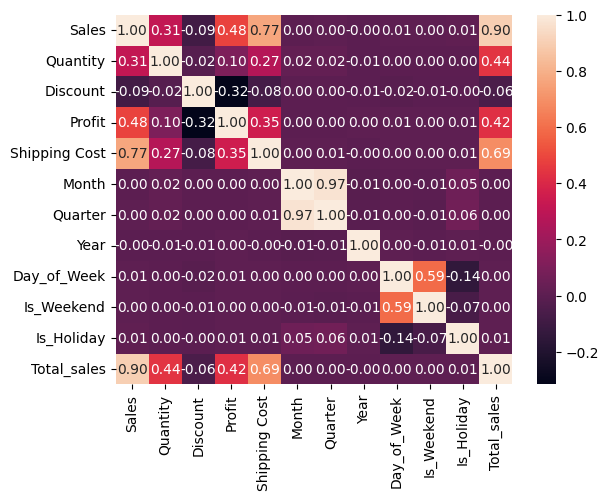

In [82]:
num_cols = sales.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True ,fmt='.2f')
plt.show()


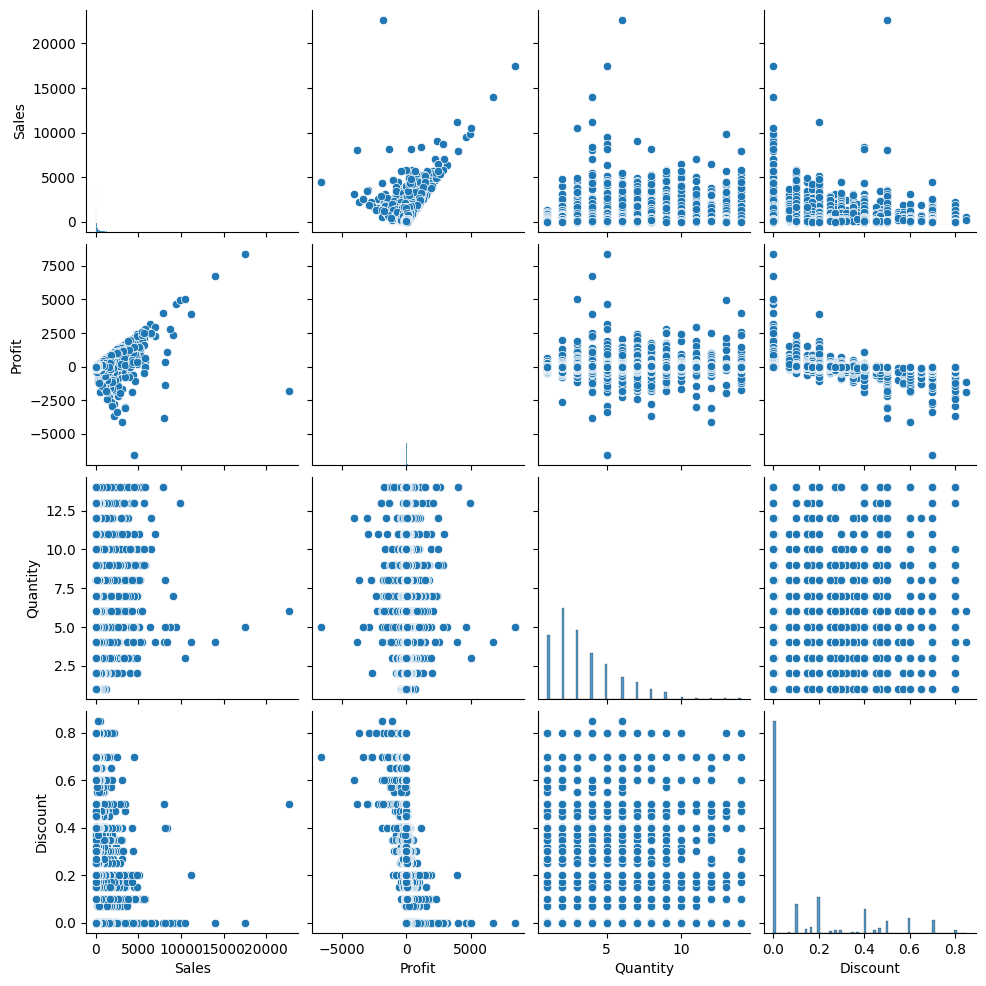

In [83]:
sns.pairplot(sales[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.show()

In [84]:
sales['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

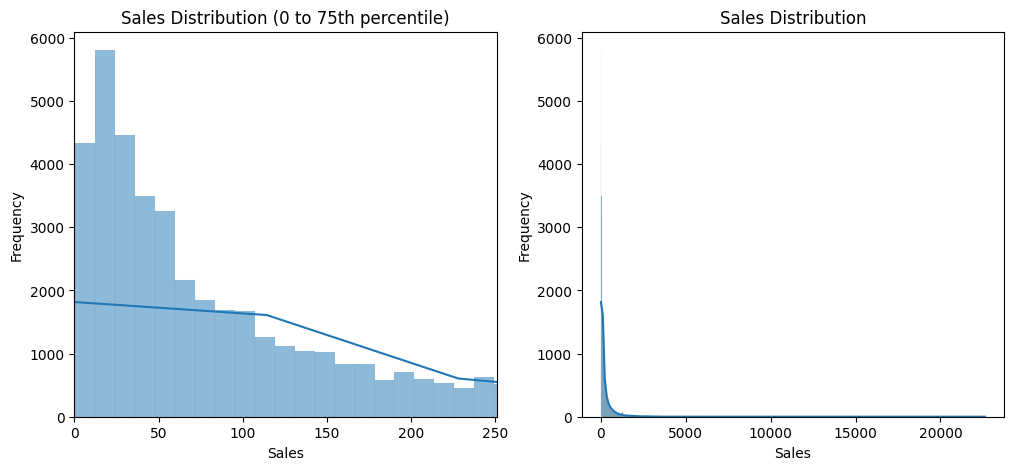

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(sales['Sales'], kde=True, ax=axes[0])
axes[0].set_xlim(0, sales['Sales'].quantile(0.75))
axes[0].set_title('Sales Distribution (0 to 75th percentile)')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

sns.histplot(sales['Sales'], kde=True, ax=axes[1])
axes[1].set_title('Sales Distribution')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

plt.show()

# Demand is more for lower prices

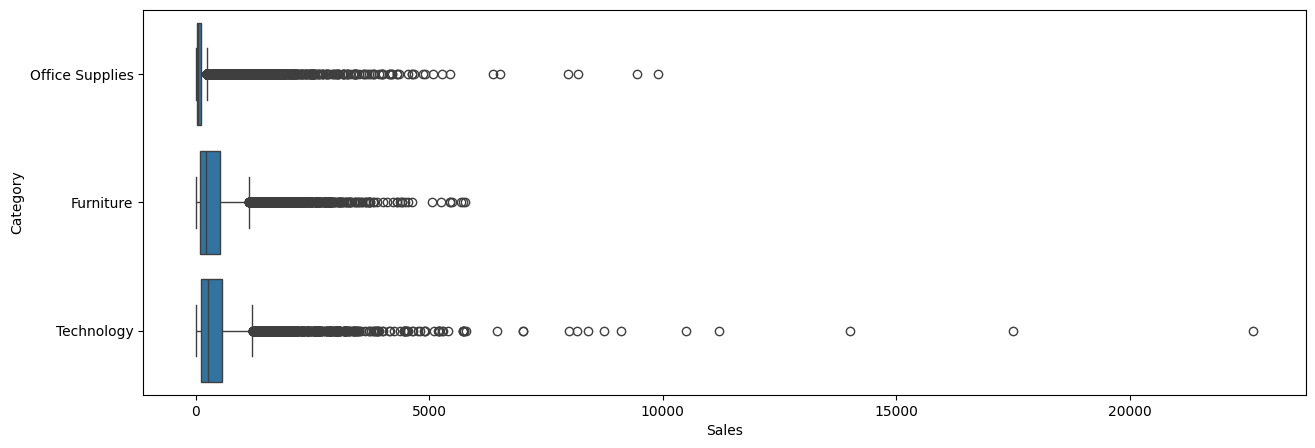

In [128]:
fig ,axes = plt.subplots(figsize=(15,5))
sns.boxplot(data=sales, y='Category', x='Sales')
plt.show() 

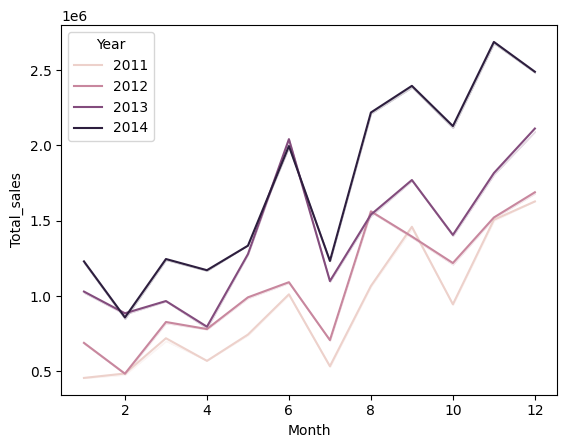

In [99]:
sales = sales.sort_values(by='Order Date')
sns.lineplot(sales ,x='Month' , y='Total_sales' ,hue='Year' ,errorbar=('ci', False), estimator=sum)
plt.show()

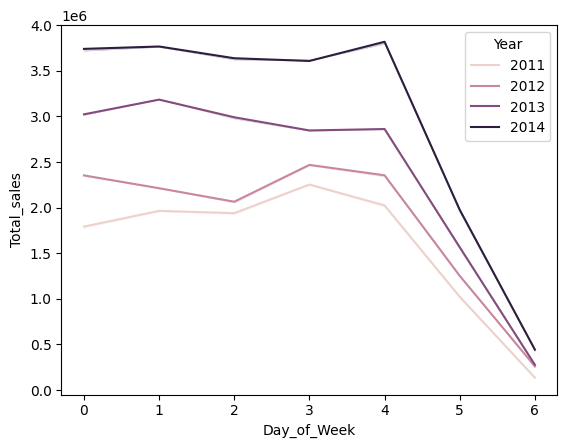

In [109]:
sns.lineplot(sales ,x='Day_of_Week' , y='Total_sales' ,hue='Year' ,errorbar=('ci', False), estimator=sum)
plt.show()

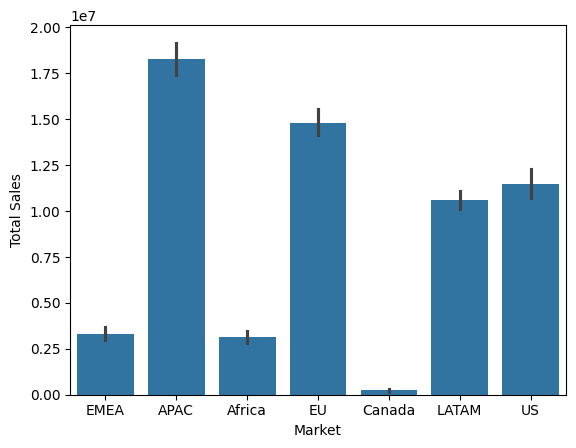

In [101]:
sns.barplot(x='Market' ,y='Total_sales' ,data=sales , estimator=sum)
plt.ylabel('Total Sales')
plt.show()

# it seems that total sales are higher in the APAC market

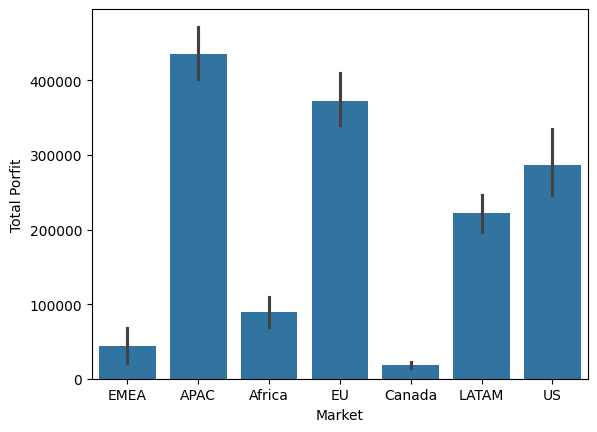

In [102]:
sns.barplot(x='Market' ,y='Profit' ,data=sales , estimator=sum)
plt.ylabel('Total Porfit')
plt.show()

# it seems that total profit is higher in the APAC market

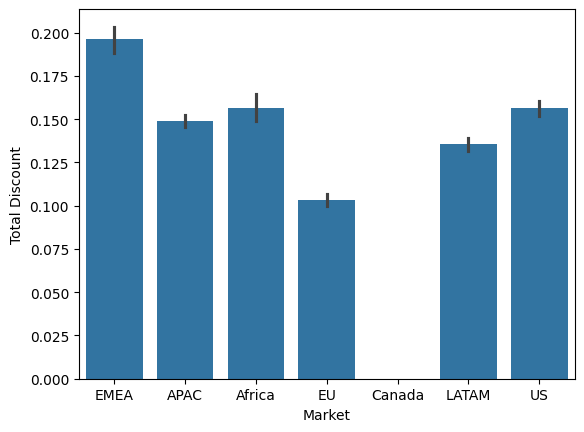

In [91]:
sns.barplot(x='Market' ,y='Discount' ,data=sales)
plt.ylabel('Total Discount')
plt.show()

In [113]:
sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales
25084,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,...,8.17,High,1,1,2011,5,1,0,Winter,264.480
22951,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,9.72,Medium,1,1,2011,5,1,0,Winter,361.098
9352,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,35.46,Medium,1,1,2011,5,1,0,Winter,816.600
42055,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,1.80,Medium,1,1,2011,5,1,0,Winter,110.484
31579,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,...,4.82,High,1,1,2011,5,1,0,Winter,134.595


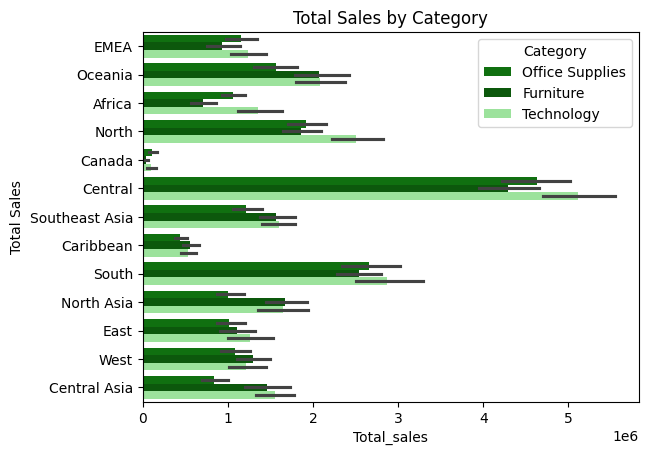

In [ ]:
sns.barplot(y='Region' ,x='Total_sales' ,data=sales ,
            estimator=sum ,hue='Category' ,
            palette=['green','darkgreen','lightgreen'] )

plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.show()

# Technology sales is higher than other categoires In most countries

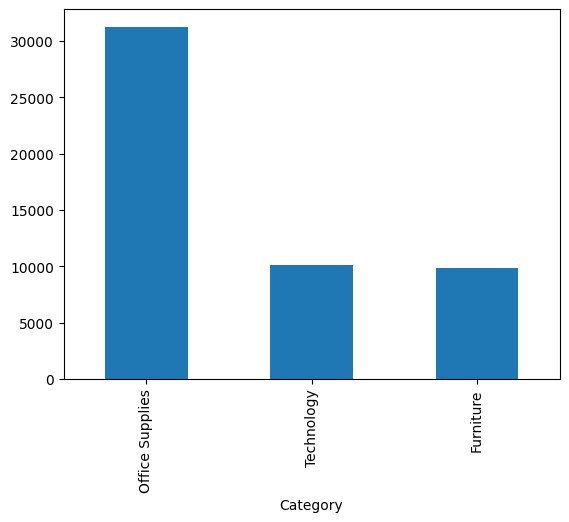

In [135]:
sales['Category'].value_counts().plot(kind='bar')
plt.show()

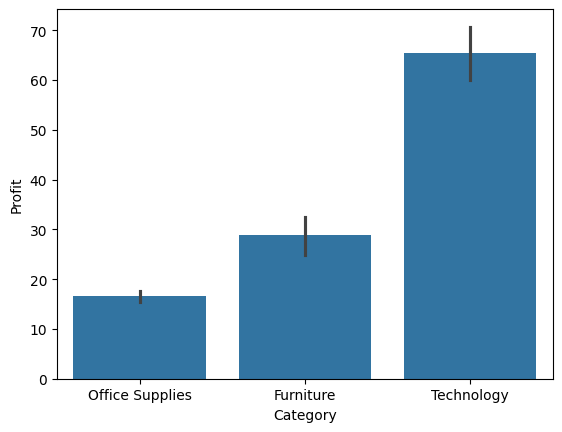

In [139]:
sns.barplot(sales, x='Category' ,y='Profit')
plt.show()

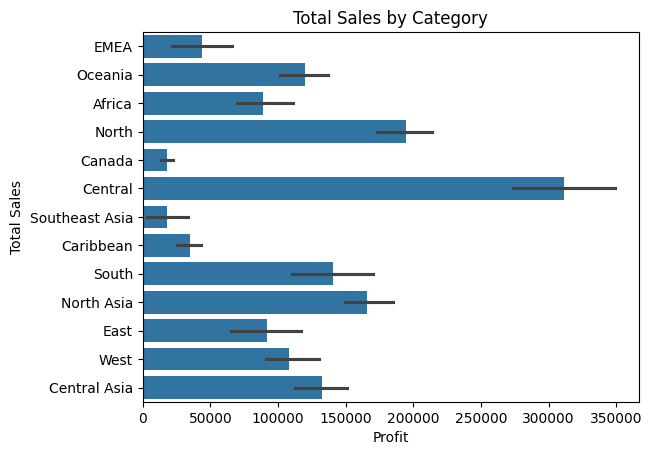

In [138]:
sns.barplot(y='Region' ,x='Profit' ,data=sales ,
            estimator=sum )

plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.show()

# Technology sales is higher than other categoires In most countries

In [147]:
sales[sales.Year == 2012]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales
26993,2012-01-02,2012-01-06,Standard Class,Edward Nazzal,Consumer,Milpa Alta,Distrito Federal,Mexico,LATAM,North,...,6.99,High,1,1,2012,0,0,1,Winter,186.240
42511,2012-01-02,2012-01-06,Standard Class,Jennifer Patt,Corporate,Givors,Rhône-Alpes,France,EU,Central,...,1.71,Medium,1,1,2012,0,0,1,Winter,79.110
4357,2012-01-02,2012-01-06,Standard Class,Andy Reiter,Consumer,Jodhpur,Rajasthan,India,APAC,Central Asia,...,74.73,High,1,1,2012,0,0,1,Winter,1240.110
31743,2012-01-02,2012-01-04,Second Class,Claudia Bergmann,Corporate,Newark,Delaware,United States,US,East,...,4.75,Critical,1,1,2012,0,0,1,Winter,60.120
11371,2012-01-02,2012-01-06,Standard Class,Kimberly Carter,Corporate,San Pedro Sula,Cortés,Honduras,LATAM,Central,...,28.41,High,1,1,2012,0,0,1,Winter,356.496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37859,2012-12-31,2013-01-05,Standard Class,Denny Joy,Corporate,Villahermosa,Tabasco,Mexico,LATAM,North,...,2.78,High,12,4,2012,0,0,0,Winter,120.320
6986,2012-12-31,2013-01-01,First Class,Thea Hudgings,Corporate,Curitiba,Parana,Brazil,LATAM,South,...,48.95,Medium,12,4,2012,0,0,0,Winter,1543.680
19498,2012-12-31,2013-01-03,Second Class,Karen Carlisle,Corporate,Henderson,Kentucky,United States,US,South,...,13.04,High,12,4,2012,0,0,0,Winter,284.220
22814,2012-12-31,2012-12-31,Same Day,Karen Bern,Corporate,Charleroi,Hainaut,Belgium,EU,Central,...,9.84,High,12,4,2012,0,0,0,Winter,105.480


In [162]:
import plotly.express as px
fig =px.line(sales[sales.Year == 2012],x='Order Date',y='Total_sales'  ,color='Is_Weekend' )
fig.show()

# it seems that the sales are higher during the holidays

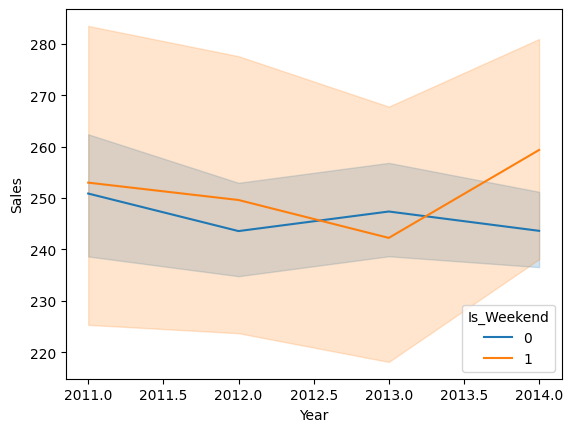

In [94]:
sns.lineplot(x='Year',y='Sales' ,data=sales ,hue='Is_Weekend')
plt.show()

# it seems that sales are higher on weekends 

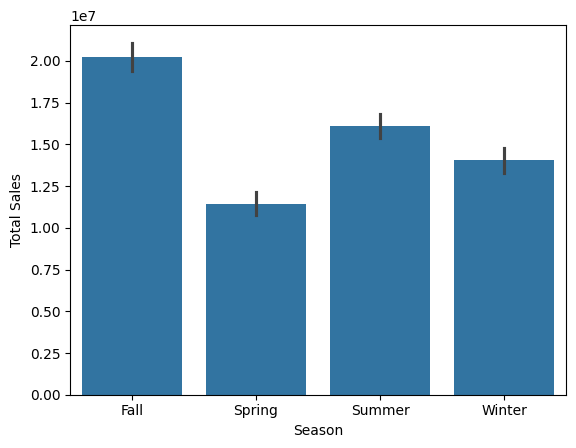

In [141]:
sns.barplot(x='Season' ,y='Total_sales' ,data=sales , estimator=sum)
plt.ylabel('Total Sales')
plt.show()

# it seems that sales are higher in the Fall season